In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('C:/Data_Science/Personal_Notebooks/Fertilizer_classification/train.csv')
data2 = pd.read_csv('C:/Data_Science/Personal_Notebooks/Fertilizer_classification/test.csv')
data3 = pd.read_csv('C:/Data_Science/Personal_Notebooks/Fertilizer_classification/Fertilizer Prediction.csv')

train_df = data1.copy()
test_df = data2.copy()
additional_df = data3.copy()

print("First 3 rows of train_df: \n", train_df.head(3))
print("First 3 rows of test_df: \n", test_df.head(3))
print("First 3 rows of test_df: \n", additional_df.head(3))

First 3 rows of train_df: 
    id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
First 3 rows of test_df: 
        id  Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
0  750000           31        70        52     Sandy        Wheat        34   
1  750001           27        62        45       Red    Sugarcane        30   
2  750002           28        72        28    Clayey  Ground Nuts        14   

   Potassium  Phosphorous  
0         11           24  
1         14           15  
2         15            4  
First 3 rows of test_df: 
    Temparature  Humi

In [3]:
train_df.shape, additional_df.shape

((750000, 10), (100000, 9))

In [4]:
train_df.columns, additional_df.columns

(Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
        'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
       dtype='object'),
 Index(['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
        'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
       dtype='object'))

In [5]:
#function to make the columns snake_case
import re

def to_snake_case(df):
    def convert(name):
        #lower case
        name = name.lower()
        # Replace spaces and hyphens with underscores
        name = re.sub(r'[\s\-]+', '_', name)
        # Add underscore before capital letters (except at the beginning)
        name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)
        # Convert to lowercase
        return name.lower()

    df.columns = [convert(col) for col in df.columns]
    return df

In [6]:
to_snake_case(train_df)
to_snake_case(test_df)
to_snake_case(additional_df)

,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,32,51,41,Red,Ground Nuts,7,3,19,14-35-14
1,35,58,35,Black,Cotton,4,14,16,Urea
2,27,55,43,Sandy,Sugarcane,28,0,17,20-20
3,33,56,56,Loamy,Ground Nuts,37,5,24,28-28
4,32,70,60,Red,Ground Nuts,4,6,9,14-35-14
...,...,...,...,...,...,...,...,...,...
99995,32,71,61,Black,Tobacco,23,1,25,20-20
99996,35,72,47,Loamy,Millets,38,1,32,17-17-17
99997,28,50,61,Sandy,Maize,10,11,14,14-35-14
99998,29,57,63,Loamy,Ground Nuts,7,10,4,DAP


In [7]:
target_id = train_df['id']
train_df = train_df.drop(columns='id')

In [9]:
full_df = pd.concat([train_df, additional_df], ignore_index= True)

print("Dfs successfully concatenated", full_df.head())

Dfs successfully concatenated    temparature  humidity  moisture soil_type  crop_type  nitrogen  potassium  \
0           37        70        36    Clayey  Sugarcane        36          4   
1           27        69        65     Sandy    Millets        30          6   
2           29        63        32     Sandy    Millets        24         12   
3           35        62        54     Sandy     Barley        39         12   
4           35        58        43       Red      Paddy        37          2   

   phosphorous fertilizer_name  
0            5           28-28  
1           18           28-28  
2           16        17-17-17  
3            4        10-26-26  
4           16             DAP  


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

full_df['soil_type'] = le.fit_transform(full_df['soil_type'])
full_df['crop_type'] = le.fit_transform(full_df['crop_type'])
full_df['fertilizer_name'] = le.fit_transform(full_df['fertilizer_name'])

In [11]:
full_df = full_df.rename(columns= {'temparature' : 'temperature'})

In [12]:
full_df['nutrient_index'] = full_df['nitrogen'] + full_df['phosphorous'] + full_df['potassium']
full_df['nutrient_moisture_ration'] = full_df['nutrient_index'] / (full_df['moisture'] + 1e-6)
full_df['climate_stress'] = (full_df['temperature'] - full_df['humidity']) / (full_df['temperature'] +1e-6)
full_df['climate_gap'] = abs(full_df['temperature'] - full_df['humidity'])
full_df['water_retention'] = full_df['moisture'] * full_df['humidity']
full_df['water_stress_index'] = full_df['temperature'] / (full_df['humidity'] + full_df['moisture'] + 1e-6)
full_df['temp_humidity'] = full_df['temperature'] * full_df['humidity']
full_df['temp_moisture'] = full_df['temperature'] * full_df['moisture']
full_df['np_ratio'] = full_df['nitrogen'] / (full_df['phosphorous'] + 1e-6)
full_df['nk_ratio'] = full_df['nitrogen'] / (full_df['potassium'] + 1e-6)
full_df['pk_ratio'] = full_df['phosphorous'] / (full_df['potassium'] + 1e-6)
full_df['total_npk'] = full_df['nitrogen'] + full_df['phosphorous'] + full_df['potassium']
full_df['n_proportion'] = full_df['nitrogen'] / (full_df['total_npk'] + 1e-6)
full_df['p_proportion'] = full_df['potassium'] / (full_df['total_npk'] + 1e-6)
full_df['k_proportion'] = full_df['potassium'] / (full_df['total_npk'] + 1e-6)

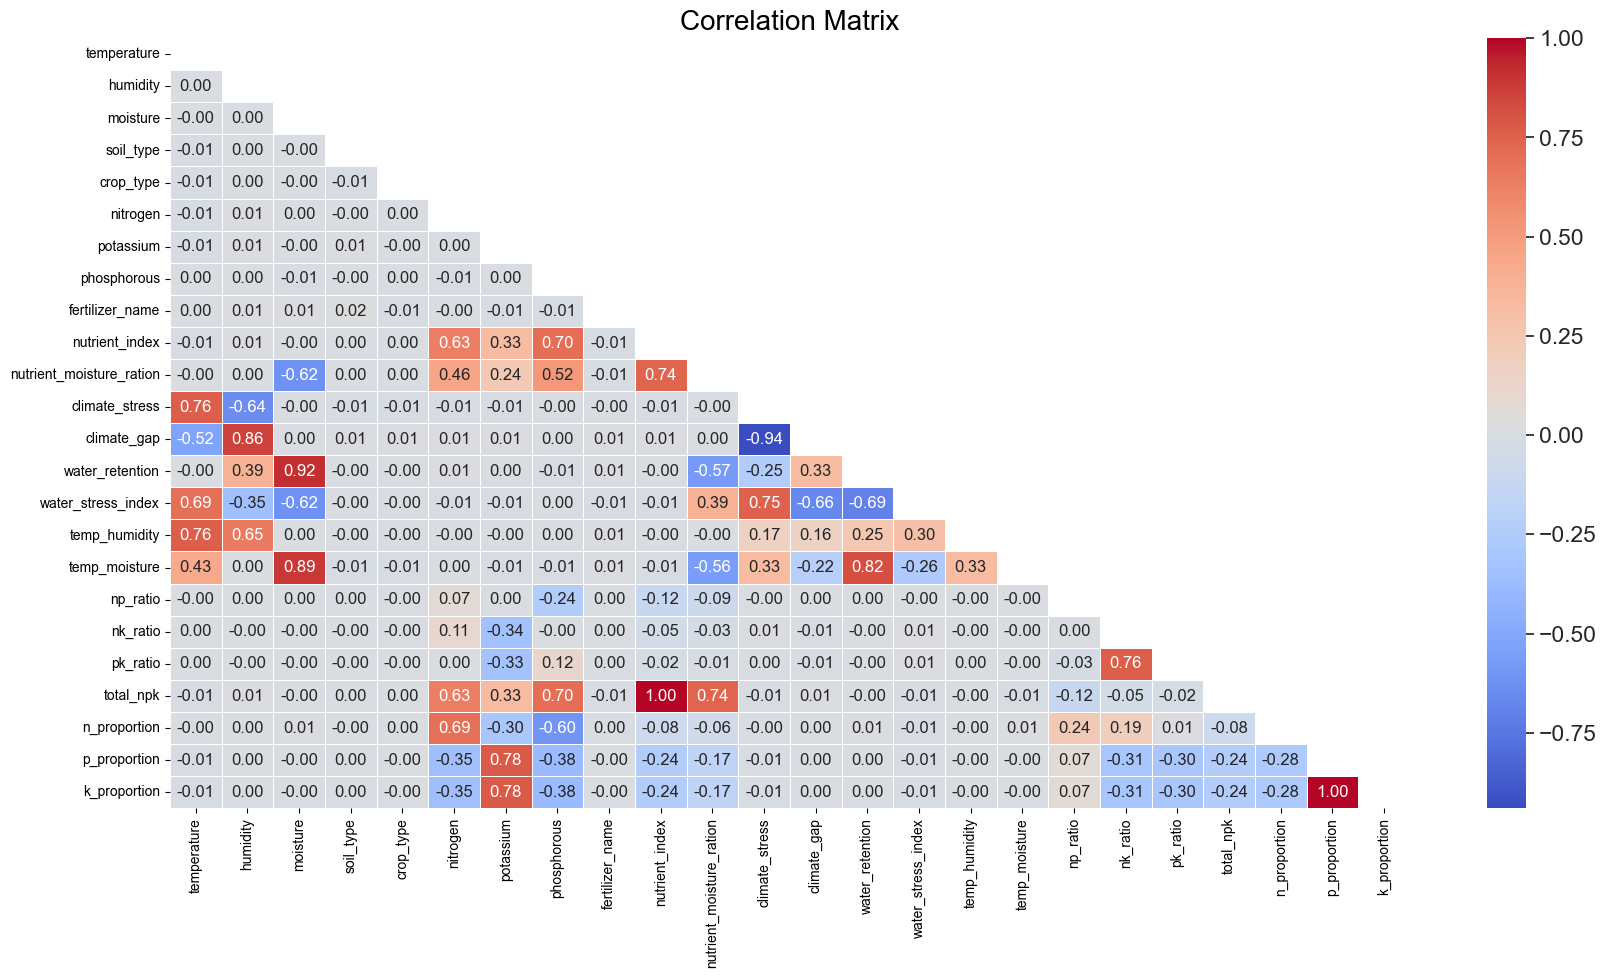

In [13]:
num_corr = round(full_df.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set_theme(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Matrix", fontsize=20) # add title
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [15]:
#classification issues
def train_and_eval_models(X_train, X_test, y_train, y_test):

    #models to test
    models = {
        "Logistic Regression" : LogisticRegression(),
        "Random Forest" : RandomForestClassifier(),
        "XGB" : XGBClassifier()
    }

    print("Starting the training process.")

    #list to store results

    results = []

    #scaling data just for LogisticRegression

    for name, model in models.items():
        if name in ['Logistic Regression']:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            print(f"Features scaled for model {name}")

        print(f"Training model: {name}")

        model.fit(X_train_scaled, y_train)

        y_train_predict = model.predict(X_train_scaled) #to test accuracy on the train dataframe
        y_test_predict = model.predict(X_test_scaled)

        results.append({
            "Model" : name,
            "Train Accuracy" : accuracy_score(y_train, y_train_predict),
            "Test Accuracy" : accuracy_score(y_test, y_test_predict),
            "Train Precision" : precision_score(y_train, y_train_predict, average = 'weighted'),
            "Test Precision" : precision_score(y_test, y_test_predict, average = 'weighted'),
            "Train F1 Score" : f1_score(y_train, y_train_predict, average = 'weighted'),
            "Test F1 Score" : f1_score(y_test, y_test_predict, average = 'weighted')
        })

    #Convering result into a df
    results_df = pd.DataFrame(results)
    print("\n Model Performance Summary: ")
    print(results_df)
    

    return results_df


In [16]:
from sklearn.model_selection import train_test_split

X = full_df.drop(columns= 'fertilizer_name')
y = full_df['fertilizer_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [17]:
results_df = train_and_eval_models(X_train, X_test, y_train, y_test)
results_df

Starting the training process.
Features scaled for model Logistic Regression
Training model: Logistic Regression
Training model: Random Forest
Training model: XGB

 Model Performance Summary: 
                 Model  Train Accuracy  Test Accuracy  Train Precision  \
0  Logistic Regression        0.157104       0.156482         0.151904   
1        Random Forest        0.999980       0.166118         0.999980   
2                  XGB        0.269294       0.186584         0.276044   

   Test Precision  Train F1 Score  Test F1 Score  
0        0.153125        0.128683       0.128319  
1        0.164911        0.999980       0.163642  
2        0.186226        0.264270       0.181206  


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train F1 Score,Test F1 Score
0,Logistic Regression,0.157104,0.156482,0.151904,0.153125,0.128683,0.128319
1,Random Forest,0.999980,0.166118,0.999980,0.164911,0.999980,0.163642
2,XGB,0.269294,0.186584,0.276044,0.186226,0.264270,0.181206


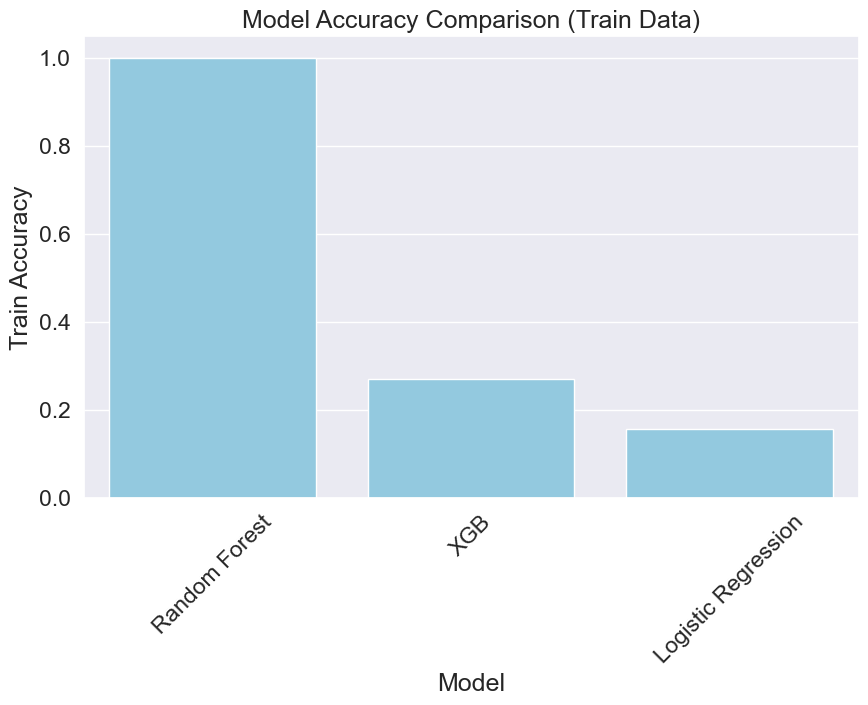

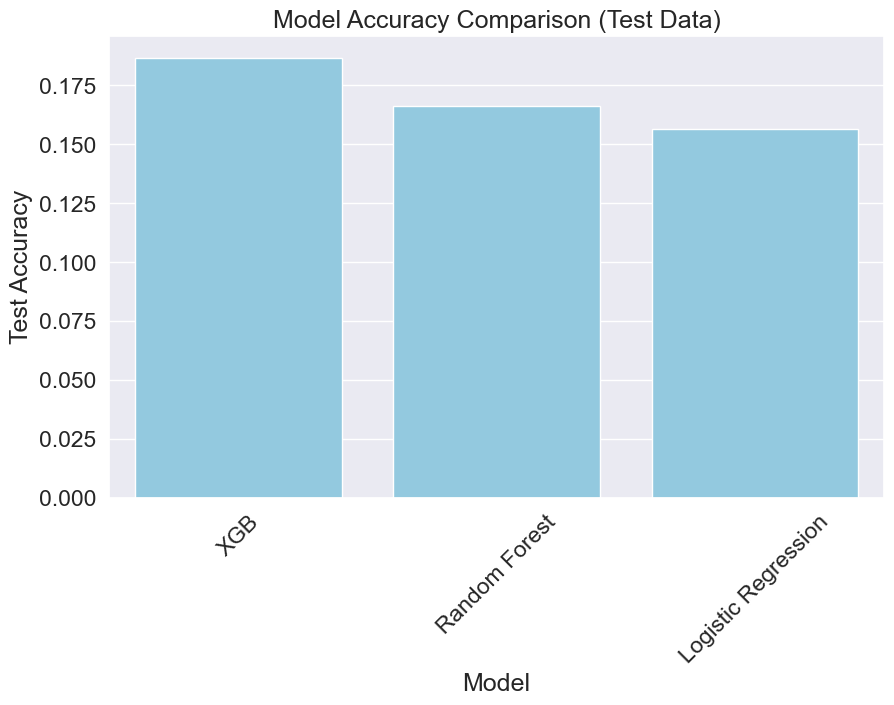

In [18]:
#plotting the results

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Train Accuracy", data=results_df.sort_values(by='Train Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Train Data)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Test Accuracy", data=results_df.sort_values(by='Test Accuracy', ascending=False), color='skyblue')
plt.title("Model Accuracy Comparison (Test Data)")
plt.xticks(rotation=45)
plt.show()

In [22]:
def objective(trial):
    """Optuna objective function for hyperparameter optimization"""

    params = {
        'objective': 'multi:softprob', 
        'num_class': len(np.unique(y_train)),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 2),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 2),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',
        'device': "cuda"
    }
    
    model = XGBClassifier(**params)

    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_log_loss')
    
    return np.median(cv_scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best CV score:", study.best_value)

[I 2025-06-16 16:03:49,235] A new study created in memory with name: no-name-446c0a4b-74bc-4a98-9387-0664125c012e
[I 2025-06-16 16:05:07,351] Trial 0 finished with value: -1.9328322124285793 and parameters: {'n_estimators': 297, 'max_depth': 4, 'learning_rate': 0.055384702200827904, 'subsample': 0.7197099648791262, 'colsample_bytree': 0.7970123799723946, 'min_child_weight': 7, 'gamma': 0.7188919839084433, 'reg_alpha': 0.7536920629713786, 'reg_lambda': 0.8965216894582633}. Best is trial 0 with value: -1.9328322124285793.
[I 2025-06-16 16:05:48,141] Trial 1 finished with value: -1.938343586161033 and parameters: {'n_estimators': 106, 'max_depth': 7, 'learning_rate': 0.016855348001845905, 'subsample': 0.6799362951953943, 'colsample_bytree': 0.750848527563138, 'min_child_weight': 6, 'gamma': 1.5456128916244736, 'reg_alpha': 0.7238242056048789, 'reg_lambda': 0.7913472536448332}. Best is trial 0 with value: -1.9328322124285793.
[I 2025-06-16 16:08:31,476] Trial 2 finished with value: -1.9275

KeyboardInterrupt: 

In [ ]:
params = {'n_estimators': 497, 
          'max_depth': 7, 
          'learning_rate': 0.06683222055257249, 
          'subsample': 0.9567932654947183, 
          'colsample_bytree': 0.6628350795487697, 
          'min_child_weight': 9, 
          'gamma': 0.24264396795161378, 
          'reg_alpha': 0.7018815106015076, 
          'reg_lambda': 1.492217648314012,
          'random_state': 42,
          'tree_method': 'hist',
          'device': "cuda"  
         }
best_model = XGBClassifier(**params)
cv_res = cross_val_score(best_model, X_train, y_train, cv=3, scoring='neg_log_loss')

print(f"Final CV scores: {cv_res}")
print(f"Mean CV score: {cv_res.mean():.4f} ± {cv_res.std():.4f}")

best_model.fit(X_train, y_train)

In [ ]:
test_df = test_df.rename(columns= {'temparature' : 'temperature'})

In [ ]:
test_df['nutrient_index'] = test_df['nitrogen'] + test_df['phosphorous'] + test_df['potassium']
test_df['nutrient_moisture_ration'] = test_df['nutrient_index'] / (test_df['moisture'] + 1e-6)
test_df['climate_stress'] = (test_df['temperature'] - test_df['humidity']) / (test_df['temperature'] +1e-6)
test_df['climate_gap'] = abs(test_df['temperature'] - test_df['humidity'])
test_df['water_retention'] = test_df['moisture'] * test_df['humidity']
test_df['water_stress_index'] = test_df['temperature'] / (test_df['humidity'] + test_df['moisture'] + 1e-6)
test_df['temp_humidity'] = test_df['temperature'] * test_df['humidity']
test_df['temp_moisture'] = test_df['temperature'] * test_df['moisture']
test_df['np_ratio'] = test_df['nitrogen'] / (test_df['phosphorous'] + 1e-6)
test_df['nk_ratio'] = test_df['nitrogen'] / (test_df['potassium'] + 1e-6)
test_df['pk_ratio'] = test_df['phosphorous'] / (test_df['potassium'] + 1e-6)
test_df['total_npk'] = test_df['nitrogen'] + test_df['phosphorous'] + full_df['potassium']
test_df['n_proportion'] = test_df['nitrogen'] / (test_df['total_npk'] + 1e-6)
test_df['p_proportion'] = test_df['potassium'] / (test_df['total_npk'] + 1e-6)
test_df['k_proportion'] = test_df['potassium'] / (test_df['total_npk'] + 1e-6)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

test_df['soil_type'] = le.fit_transform(test_df['soil_type'])
test_df['crop_type'] = le.fit_transform(test_df['crop_type'])

In [ ]:
X_submission = test_df.drop(columns='id')

y_submission = best_model.predict(X_submission)

y_submission = le.inverse_transform(y_submission)

submission_df = pd.DataFrame({
    'id' : test_df['id'],
    'Fertilizer Name' : y_submission
})

submission_df.to_csv("submission3.csv", index= False)

print("Success!")